In [140]:
import numpy as np 
import pandas as pd

In [141]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [142]:
n_patients = 1000 

n_tests = 10 
test_name = [f"f{x}" for x in range(n_tests)]

mega_tests = np.random.randn(n_patients, n_tests)
patient_name = [f"P{x}" for x in range(n_patients)]
df = pd.DataFrame(list(zip(patient_name, *zip(*mega_tests))), columns= ["name"] + test_name)

# Adding Prediction.
wts = np.random.randn(n_tests, 1)
std = 0.1
y = mega_tests @ wts + std * np.random.randn(n_patients, 1)
df['disease_prob'] = sigmoid(y)

In [143]:
n_patients = 15 

n_tests = 10 
test_name = [f"f{x}" for x in range(n_tests)]

mega_tests = np.random.randn(n_patients, n_tests)
patient_name = [f"PT{x}" for x in range(n_patients)]
dft = pd.DataFrame(list(zip(patient_name, *zip(*mega_tests))), columns= ["name"] + test_name)

In [144]:
df_m = pd.concat([df, dft])

In [145]:
df_m.head().T

,0,1,2,3,4
name,P0,P1,P2,P3,P4
f0,0.128947,0.142428,-0.442881,-0.202765,-1.470125
f1,-0.201857,0.907192,-2.043614,0.648578,-2.270765
f2,1.432165,0.255912,-0.03119,-0.141706,-0.740985
f3,0.166448,-0.444975,-0.162272,-0.884873,-1.80839
f4,0.433009,-0.645823,0.458364,1.078931,0.05764
f5,0.461571,1.234008,-0.236585,-0.192733,-1.479546
f6,0.43302,-1.167625,0.0128,-0.174326,-1.183899
f7,1.14346,1.081185,0.133734,1.410768,0.556934
f8,0.590826,-0.024522,-1.437295,2.153012,-1.126765


In [146]:
Xtest = df_m[df_m["disease_prob"].isna()]
X_tr_cv = df_m[~(df_m["disease_prob"].isna())]
Y_tr_cv = X_tr_cv["disease_prob"]
Y_tr_cv[ Y_tr_cv >= 0.5 ] = 1
Y_tr_cv[ Y_tr_cv < 0.5 ] = 0

C:\Users\tirth\AppData\Local\Temp/ipykernel_99956/927527093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_tr_cv[ Y_tr_cv >= 0.5 ] = 1
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\tirth\AppData\Local\Temp/ipykernel_99956/927527093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_tr_cv[ Y_tr_cv < 0.5 ] = 0


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_tr_cv, Y_tr_cv, test_size = 0.2, shuffle = True)
X_tr_rdx = X_tr.drop(["name", "disease_prob"], axis = 1)
X_cv_rdx = X_cv.drop(["name", "disease_prob"], axis = 1)

In [148]:
X_tr_rdx.shape, Y_tr.shape, X_cv.shape, Y_cv.shape

((800, 10), (800,), (200, 12), (200,))

In [153]:
lambdas = np.linspace(0.01, 10, 100)
tr_loss, te_loss = [], []

def accuracy(Yp, Y):
    return (Yp == Y).mean()
for lmbda in lambdas:
    model = LogisticRegression(C = 1/lmbda)
    model.fit(X_tr_rdx, Y_tr)
    tr_loss.append(accuracy(model.predict(X_tr_rdx), Y_tr))
    te_loss.append(accuracy(model.predict(X_cv_rdx), Y_cv))

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


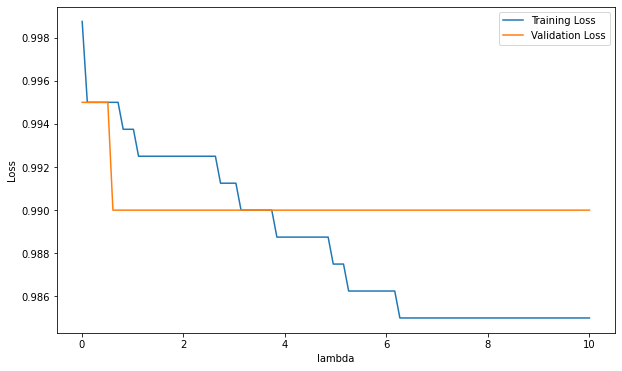

In [156]:
import matplotlib.pyplot as plt 
import seaborn as sns
 
plt.figure(figsize=(10, 6))
sns.lineplot(lambdas , tr_loss)
sns.lineplot(lambdas, te_loss)
plt.xlabel('lambda')
plt.ylabel('Loss')
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [157]:
X_tr_total = X_tr_cv.drop(["name", "disease_prob"], axis = 1)
lmbda = 0.3 
model = LogisticRegression(C = 1/lmbda)
model.fit(X_tr_total, Y_tr_cv)

LogisticRegression(C=3.3333333333333335)

In [164]:
print(f'Model Accuracy: {accuracy(model.predict(X_tr_total), Y_tr_cv) * 100}%')

Model Accuracy: 99.7%


In [165]:
model.coef_, model.intercept_

(array([[-7.61998918,  4.04733115, -0.09707868, -0.21748954, -4.96288937,
          4.68312372,  0.35320997, -5.02861375, -2.4212442 , -3.5445488 ]]),
 array([-0.11906608]))